In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:

data = pd.read_json("Jeopardy.json")

data

,category,air_date,question,value,answer,round,show_number
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680
...,...,...,...,...,...,...,...
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,$2000,Turandot,Double Jeopardy!,4999
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,$2000,a titmouse,Double Jeopardy!,4999
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",$2000,Clive Barker,Double Jeopardy!,4999
216928,QUOTATIONS,2006-05-11,"'From Ft. Sill, Okla. he made the plea, Arizon...",$2000,Geronimo,Double Jeopardy!,4999


In [67]:
histogram = data['category'].value_counts()
histogram

BEFORE & AFTER        547
SCIENCE               519
LITERATURE            496
AMERICAN HISTORY      418
POTPOURRI             401
                     ... 
1999 TELEVISION         1
WORDS IN PHYSICS        1
LITERATURE & MUSIC      1
'90s NOTABLES           1
CELEBRITY NAMES         1
Name: category, Length: 27995, dtype: int64

In [90]:
# Categories
scienceCategories = ["PHYSIC","SCIENCE","BIOLOGY","CHEMISTRY","MATH"]
literatureCategories = ["AUTHOR","NOVEL","BOOK","POET","LITERATURE"]
historyCategories = ["LEADERS","HISTORY","MONARCH"]
moviesCategories = ["FILM","MOVIE","ACTOR","ACTRESS","OSCAR"]
sportsCategories = ["SPORT","SOCCER","FOOTBALL","CRICKET","RUGBY","OLYMPIC","BASEBALL"]
celebrityCategories = ["CELEB","FAMOUS"]
playsCategories = ["PLAY","MUSICAL","BROADWAY","TONY"]
musicCategories = ["MUSIC","INSTRUMENT","PIANO","CELLO","VIOLIN","TRUMPET","SONG","LYRIC"]
geographyCategories = ["NATIONS","FLAGS","COUNTRY","GEOGRAPHY"]
ourCategoryNames = ["SCIENCE","LITERATURE","HISTORY","MOVIES","SPORTS","CELEBRITY","PLAYS","MUSIC","GEOGRAPHY"]
ourCategories = [scienceCategories,literatureCategories,historyCategories,moviesCategories,sportsCategories,celebrityCategories,playsCategories,musicCategories,geographyCategories]
categories = data['category'].unique()

In [91]:
missingCategories = [True] * categories.__len__()
i = 0
for category in ourCategories:
    category = np.array(category)
    isin = [any(x in element for x in category) for element in categories]
    #missingCategories = missingCategories and not isin
    ourCategories[i] = categories[isin]
    i+=1
print(ourCategories[0])

['SCIENCE CLASS' 'GENERAL SCIENCE' 'SCIENCE' 'MATHEM-ATTACK!'
 'SCIENCE & NATURE' 'PHYSICAL SCIENCE' 'SCIENCE GUYS' 'SIMPLE SCIENCE'
 '"A" SCIENCE CATEGORY' 'LIFE SCIENCE' 'YOU DO THE MATH' 'BIOLOGY'
 'PHYSICS' 'GIANTS OF SCIENCE' 'MATH TERMS' 'SCIENCE BRIEFS'
 'BASIC SCIENCE' 'PHYSICS 101' 'SCIENCE & TECHNOLOGY' 'PARTICLE PHYSICS'
 'WOMEN IN SCIENCE' '"A" IN SCIENCE' 'CHEMISTRY' 'NAMES IN SCIENCE'
 'PHYSICISTS' 'MATH' '"D" IN SCIENCE' 'SCIENCE TERMS' 'MATHLETES'
 'SOCIAL SCIENCE' 'SCIENCE AT THE EXPLORATORIUM' 'SCIENCE "T"ALK'
 'TOP 40 MATH' 'REAL MEN OF SCIENCE' '20th CENTURY SCIENCE'
 'MATH VOCABULARY' 'SCIENCE FICTION' 'CHEMISTRY CLASS' 'FIELDS OF SCIENCE'
 '"F" IN MATH' 'SCIENCE GRAB BAG' 'PRESIDENTIAL MATH' 'SCIENCE HISTORY'
 'MATH SYMBOLS' 'MICROBIOLOGY MILESTONES' 'POLITICAL SCIENCE'
 'MARINE BIOLOGY' '19th CENTURY SCIENCE' '2-WORD SCIENCE RESPONSES'
 'SCIENCE "L"IST' 'MEN OF SCIENCE' 'EPONYMOUS SCIENCE' 'MILITARY SCIENCE'
 'THE SOCIAL SCIENCES' 'EVERYDAY SCIENCE' 'TOUGH SCIENC

In [98]:
ourHistogram = []
for categoryList in ourCategories:
    s = 0
    for c in categoryList:
        s += histogram[c]
    ourHistogram.append(s)
ourHistogram = np.array(ourHistogram).reshape(1,len(ourHistogram))
ourHistogram = pd.DataFrame(ourHistogram,columns=ourCategoryNames)
ourHistogram

,SCIENCE,LITERATURE,HISTORY,MOVIES,SPORTS,CELEBRITY,PLAYS,MUSIC,GEOGRAPHY
0,3362,6910,4345,7154,3583,2303,3462,5293,2700


In [20]:
sciencedata = data[data['category'].str.contains(scienceCategories)]
sciencedata['category'].unique()
litdata = data[data['category'].str.contains("LITERATURE")]

TypeError: unhashable type: 'list'

<AxesSubplot: >

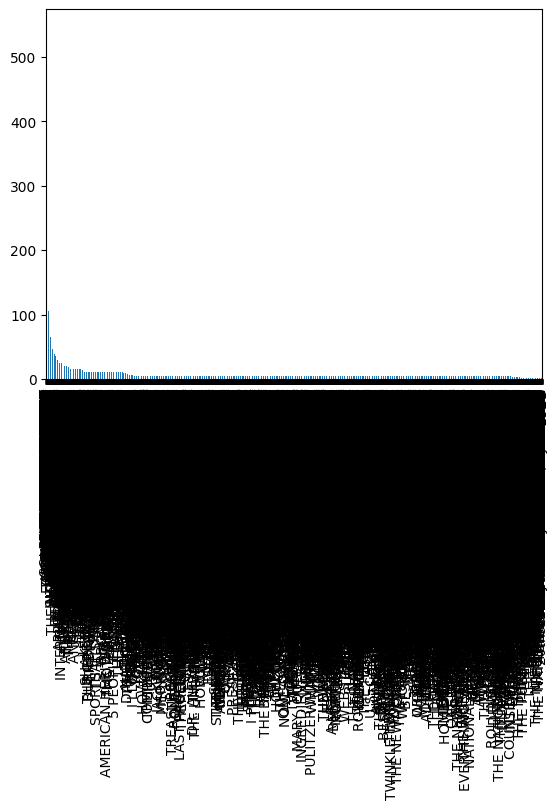

In [13]:
data.category.value_counts().plot(kind='bar', stacked=True)